## Step1 データセット準備（Train, Validation, Test）

In [1]:
import os, shutil

In [2]:
os.getcwd()

'/Users/youngsend/KerasLearning'

In [3]:
original_dataset_dir = '/Users/youngsend/KerasLearning/dogs-vs-cats/train'

base_dir = '/Users/youngsend/KerasLearning/cats_and_dogs_small'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

<img src='screenshots/Screen Shot 2019-04-06 at 19.04.42.png'>
<img src='screenshots/Screen Shot 2019-04-06 at 19.06.59.png'>
<img src='screenshots/Screen Shot 2019-04-06 at 19.08.12.png'>

## Step2 Networkの構築やコンパイル

In [9]:
from keras import layers
from keras import models

In [10]:
model = models.Sequential()

【共有１】：Conv2D関数にinput_shapeというパラメータがないけど、一層目に使うときは、input_shapeを追加する
 <img src='screenshots/Screen Shot 2019-04-06 at 18.47.12.png'>

In [11]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## Step3 データ前処理

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 103s 1s/step - loss: 0.6896 - acc: 0.5290 - val_loss: 0.6738 - val_acc: 0.6240
Epoch 2/30
100/100 [==============================] - 98s 984ms/step - loss: 0.6585 - acc: 0.5975 - val_loss: 0.6442 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 101s 1s/step - loss: 0.6228 - acc: 0.6545 - val_loss: 0.6126 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 100s 995ms/step - loss: 0.5680 - acc: 0.7075 - val_loss: 0.6033 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 97s 969ms/step - loss: 0.5416 - acc: 0.7200 - val_loss: 0.5909 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 100s 996ms/step - loss: 0.5110 - acc: 0.7410 - val_loss: 0.5771 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 95s 950ms/step - loss: 0.4818 - acc: 0.7685 - val_loss: 0.5608 - val_acc: 0.7080
Epoch 8/3

In [19]:
model.save('cats_and_dogs_small_1.h5')

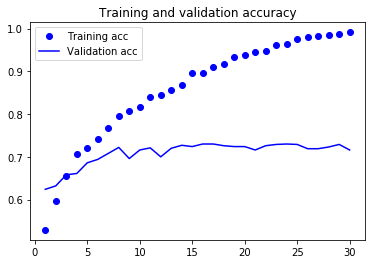

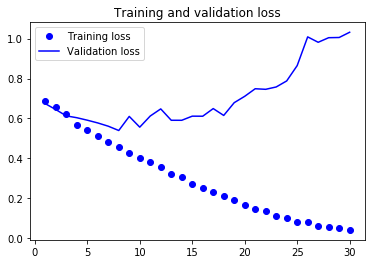

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Step4 Data Augmentation（データ増強）を適用する

In [22]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

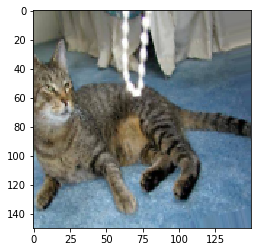

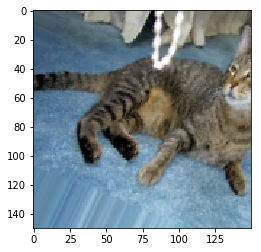

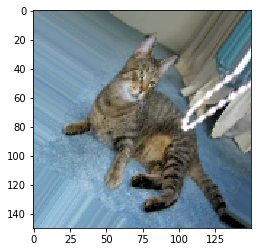

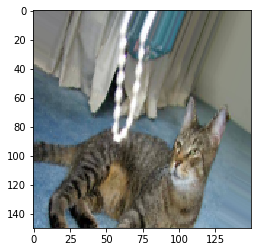

In [26]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [27]:
img_path

'/Users/youngsend/KerasLearning/cats_and_dogs_small/train/cats/cat.749.jpg'

<img src='screenshots/Screen Shot 2019-04-06 at 22.56.46.png'>

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

## なぜData Augmentationがoverfittingを解消できるか？
The network will never see the same input twice. But the inputs it sees are still heavily intercorrelated.
しかし、Data Augmentationをしない場合、epoch毎に同じinputで訓練する。

In [37]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 159s 2s/step - loss: 0.6934 - acc: 0.5159 - val_loss: 0.6844 - val_acc: 0.4975
Epoch 2/100
100/100 [==============================] - 156s 2s/step - loss: 0.6759 - acc: 0.5647 - val_loss: 0.6603 - val_acc: 0.5902
Epoch 3/100
100/100 [==============================] - 162s 2s/step - loss: 0.6656 - acc: 0.5916 - val_loss: 0.6422 - val_acc: 0.5964
Epoch 4/100
100/100 [==============================] - 152s 2s/step - loss: 0.6468 - acc: 0.6050 - val_loss: 0.6242 - val_acc: 0.6430
Epoch 5/100
100/100 [==============================] - 157s 2s/step - loss: 0.6293 - acc: 0.6344 - val_loss: 0.7152 - val_acc: 0.5749
Epoch 6/100
100/100 [==============================] - 151s 2s/step - loss: 0.6174 - acc: 0.6447 - val_loss: 0.6256 - val_acc: 0.6334
Epoch 7/100
100/100 [==============================] - 151s 2s/step - loss: 0.6100 - acc: 0.6581 - val_loss: 0.5946 - val_acc: 0.6770
Epoch 8/100
100/100 [==============================] - 150s 2s

Epoch 62/100
100/100 [==============================] - 146s 1s/step - loss: 0.4291 - acc: 0.7963 - val_loss: 0.5282 - val_acc: 0.7684
Epoch 63/100
100/100 [==============================] - 146s 1s/step - loss: 0.4443 - acc: 0.7912 - val_loss: 0.4811 - val_acc: 0.7790
Epoch 64/100
100/100 [==============================] - 146s 1s/step - loss: 0.4392 - acc: 0.7966 - val_loss: 0.4897 - val_acc: 0.7758
Epoch 65/100
100/100 [==============================] - 146s 1s/step - loss: 0.4523 - acc: 0.7928 - val_loss: 0.5685 - val_acc: 0.7367
Epoch 66/100
100/100 [==============================] - 146s 1s/step - loss: 0.4288 - acc: 0.8066 - val_loss: 0.4908 - val_acc: 0.7577
Epoch 67/100
100/100 [==============================] - 146s 1s/step - loss: 0.4351 - acc: 0.7987 - val_loss: 0.5071 - val_acc: 0.7862
Epoch 68/100
100/100 [==============================] - 146s 1s/step - loss: 0.4437 - acc: 0.7922 - val_loss: 0.4577 - val_acc: 0.7764
Epoch 69/100
100/100 [==============================] -

In [39]:
model.save('cats_and_dogs_small_2.h5')

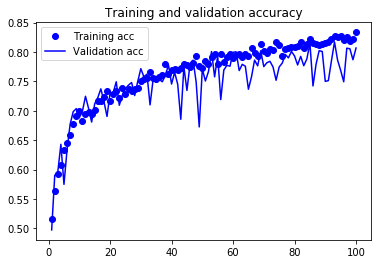

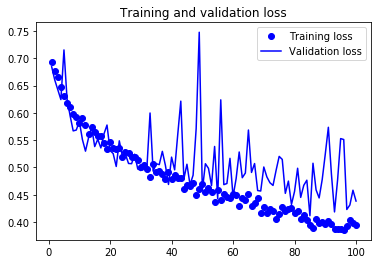

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Step5 Pretrainedモデルを使う
Pretrainedモデルを使う2つ方法：feature extraction and fine-tuning

In [43]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 40s 1us/step


In [52]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [46]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/youngsend/KerasLearning/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150, 150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [50]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6125 - acc: 0.6570 - val_loss: 0.4569 - val_acc: 0.8120
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4415 - acc: 0.7960 - val_loss: 0.3657 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3623 - acc: 0.8470 - val_loss: 0.3222 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3208 - acc: 0.8675 - val_loss: 0.3107 - val_acc: 0.8720
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2855 - acc: 0.8780 - val_loss: 0.2849 - val_acc: 0.8850
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2661 - acc: 0.9015 - val_loss: 0.2680 - val_acc: 0.8970
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2456 - acc: 0.9010 - val_loss: 0.2630 - val_acc: 0.8990
Epoch 8/30
200

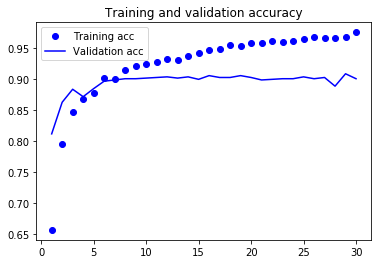

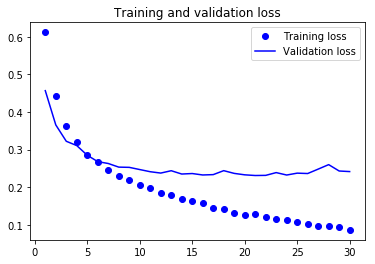

In [51]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Freezeの理由は、ただ訓練コストだけじゃなく、Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through network, effectively destroying the representations previously learned.

In [55]:
print('This is the number of trainable weights '
     'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [56]:
conv_base.trainable = False

In [57]:
print('This is the number of trainable weights '
     'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


4の意味：four weight tensors: two per layer (the main weight matrix and the bias vector)

## Note: This technique is so expensive that you should only attempt it if you have access to a GPU - it's absolutely intractable on CPU. If you can't run your code on GPU, then the previous technique is the way to go.

In [58]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 561s 6s/step - loss: 0.5837 - acc: 0.7000 - val_loss: 0.4416 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 545s 5s/step - loss: 0.4811 - acc: 0.7780 - val_loss: 0.3598 - val_acc: 0.8660
Epoch 3/30
100/100 [==============================] - 548s 5s/step - loss: 0.4363 - acc: 0.8010 - val_loss: 0.3266 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 551s 6s/step - loss: 0.4054 - acc: 0.8165 - val_loss: 0.3130 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 562s 6s/step - loss: 0.3780 - acc: 0.8375 - val_loss: 0.2923 - val_acc: 0.8840
Epoch 6/30
100/100 [==============================] - 568s 6s/step - loss: 0.3674 - acc: 0.8320 - val_loss: 0.2827 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 546s 5s/step - loss: 0.3655 - acc: 0.8365 - val_loss: 0.2724 - v

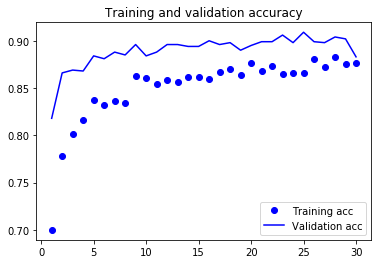

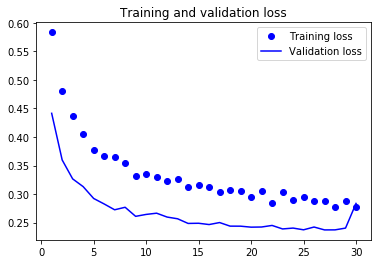

In [60]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

この結果は本に書いてあるのと違う。。。Validation accやlossは変わっていない。ただTraining accやlossが減った。でも、この訓練したモデルのdensely connected classifierはfine tuningで使う。

<img src='screenshots/Screen Shot 2019-04-07 at 16.45.30.png'>

## Step6: Fine-tuning
1. Add your custom network on top of an already-trained base network
2. Freeze the base network
3. Train the part you added
4. Unfreeze some layers in the base network
5. Jointly train both these layers and the part you added

## なぜもっと多い層をfine-tuneしない？なぜ全ての層をfine-tuneしない？
1. Earlier layers in the convolutional base encode more-generic, reusable features, whereas layers higher up encode more-specialized features. It's more useful to fine-tune the more specialized features, because these are the ones that need to be repurposed on your new problem. There would be fast-decreasing returns in fine-tuning lower layers.
2. The more parameters you're training, the more you're at risk of overfitting. The convolutional base has 15 million parameters, so it would be risky to attempt to train it on you small dataset.

In [61]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [62]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 628s 6s/step - loss: 0.2812 - acc: 0.8745 - val_loss: 0.2527 - val_acc: 0.9020
Epoch 2/30
100/100 [==============================] - 613s 6s/step - loss: 0.2561 - acc: 0.8870 - val_loss: 0.2104 - val_acc: 0.9160
Epoch 3/30
100/100 [==============================] - 624s 6s/step - loss: 0.2377 - acc: 0.9025 - val_loss: 0.1978 - val_acc: 0.9340
Epoch 4/30
100/100 [==============================] - 610s 6s/step - loss: 0.2226 - acc: 0.9025 - val_loss: 0.2046 - val_acc: 0.9200
Epoch 5/30
100/100 [==============================] - 608s 6s/step - loss: 0.1972 - acc: 0.9200 - val_loss: 0.2378 - val_acc: 0.9080
Epoch 6/30
100/100 [==============================] - 684s 7s/step - loss: 0.1957 - acc: 0.9205 - val_loss: 0.2271 - val_acc: 0.9210
Epoch 7/30
100/100 [==============================] - 682s 7s/step - loss: 0.1722 - acc: 0.9300 - val_loss: 0.2117 - val_acc: 0.9310
Epoch 8/30
100/100 [==============================] - 622s 6s/step - 

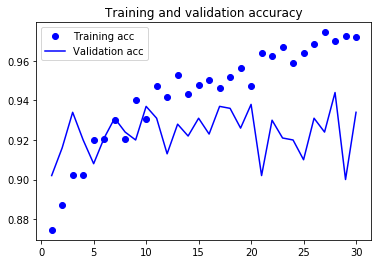

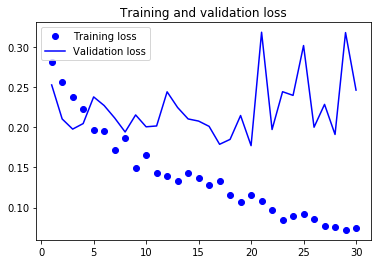

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

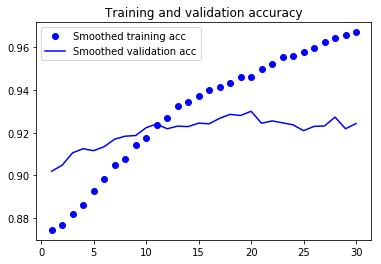

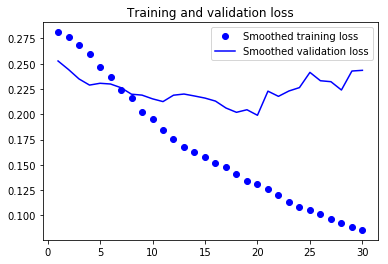

In [65]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

You may wonder, how could accuracy stay stable or improve if the loss isn't decreasing?
The answer is simple: what you display is an average of pointwise loss values; but what matters for accuracy is the distribution of the loss values, not their average, because accuracy is the result of a binary thresholding of the class probability predicted by the model.

In [66]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.928999993801117
